In [1]:
from generate_frap_curve_fxns import generate_frap_curves
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pylab as pl

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


Completed: droplet_01.tif


TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


Completed: droplet_02.tif


TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


Completed: droplet_03.tif


TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


Completed: droplet_04.tif


TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


Completed: droplet_05.tif


TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


Completed: droplet_06.tif


TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


Completed: droplet_07.tif


TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


Completed: droplet_08.tif


TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


Completed: droplet_09.tif
Completed: droplet_10.tif


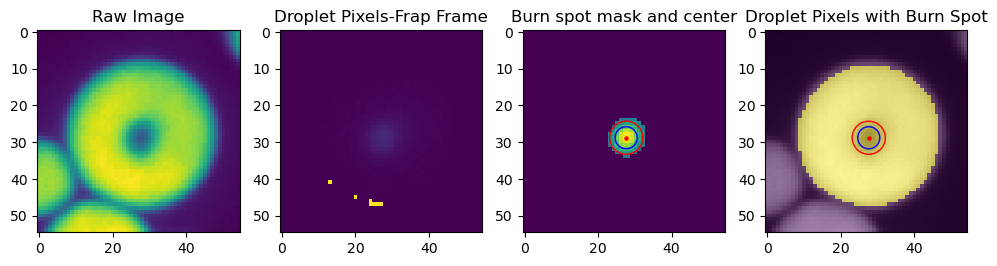

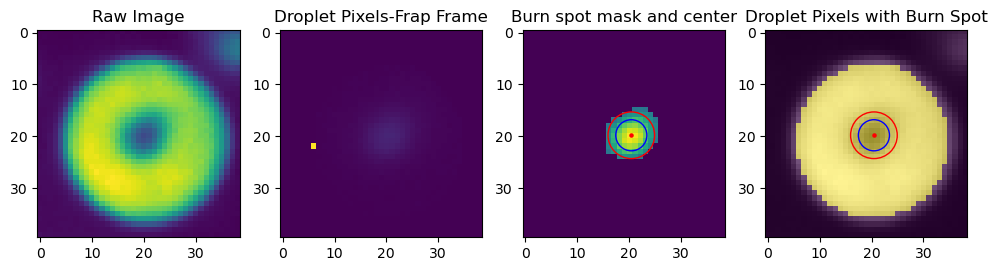

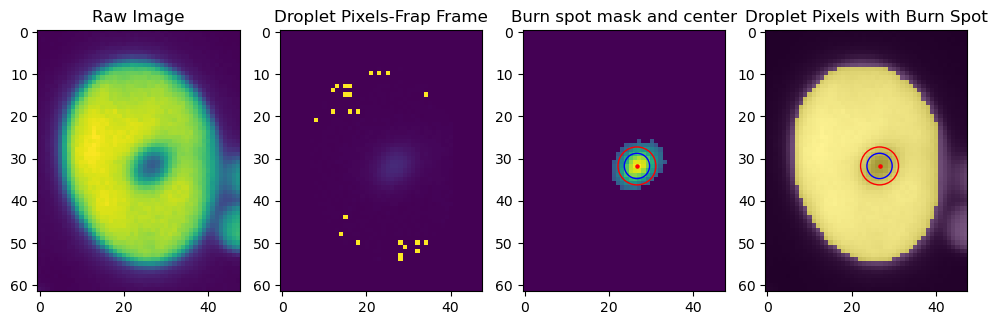

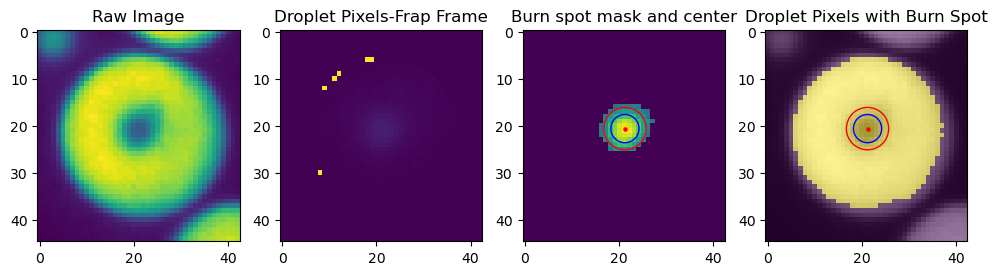

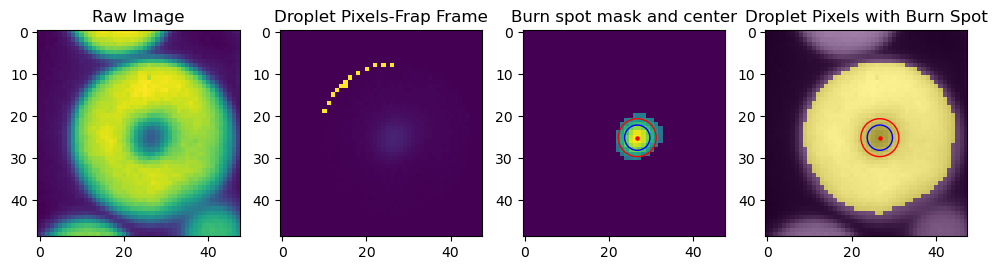

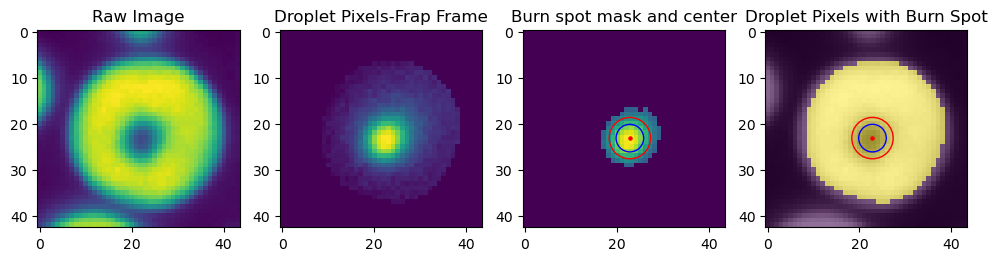

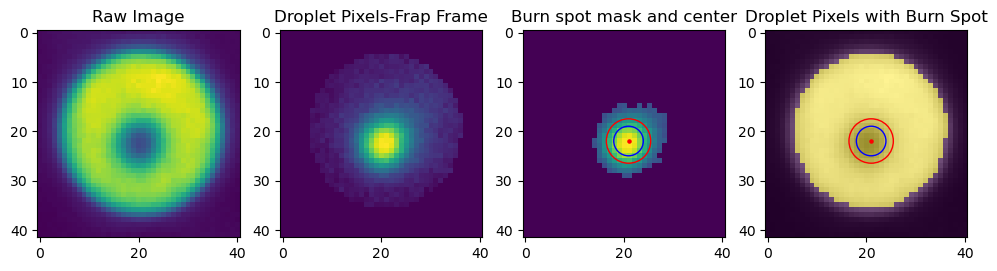

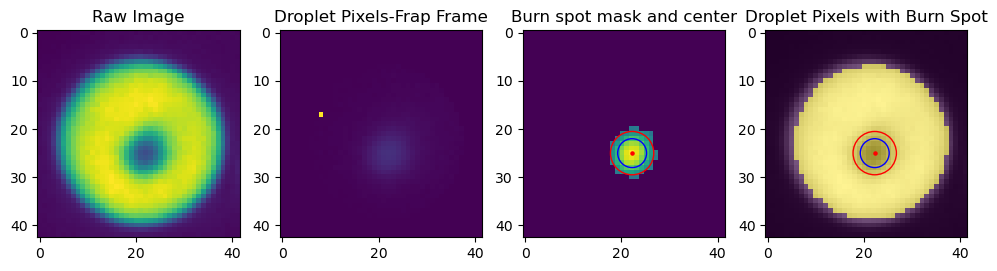

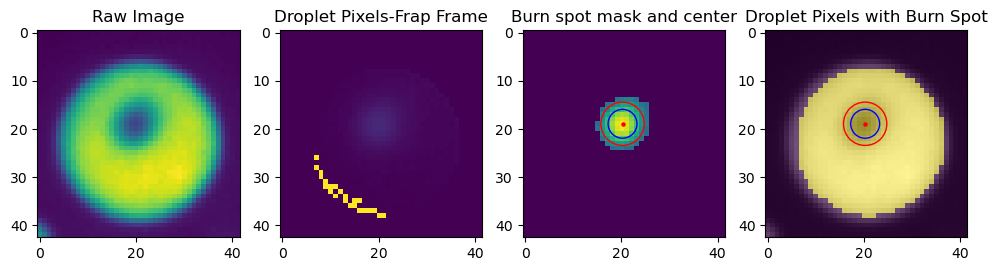

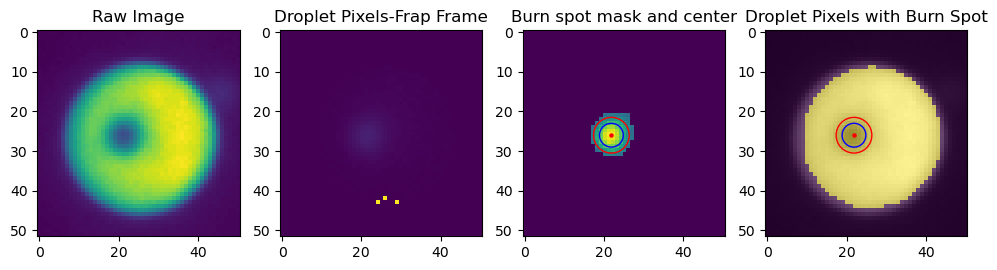

In [2]:
read_dir = './demo_files/'
save_dir = './demo_output/'
saveoutput = 1
radius = 3
frap_frame = 4;
#The units of time_array are up to the user.
#Here they are in seconds.
time_array = np.arange(0,100)-frap_frame

#First, we want to identify the burn spots in each timecourse and then generate the normalized FRAP curves. 
norm_intensities = generate_frap_curves(read_dir, save_dir, time_array, frap_frame, radius, saveoutput);

Text(0, 0.5, 'Normalized Fluorescence Intensity')

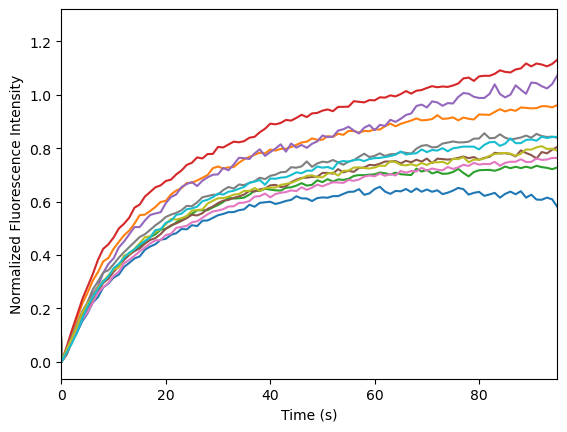

In [3]:
#We can then plot the output of the normalized FRAP curves
#Here, each trace is from a separate droplet
for i in range(0,10):
    plt.plot(time_array,norm_intensities[i])
    
plt.xlim([0,95])   
plt.xlabel('Time (s)')
plt.ylabel('Normalized Fluorescence Intensity')

Text(0.05, 0.95, '$\\mu=$19.06 s\n$\\sigma=$2.38 s')

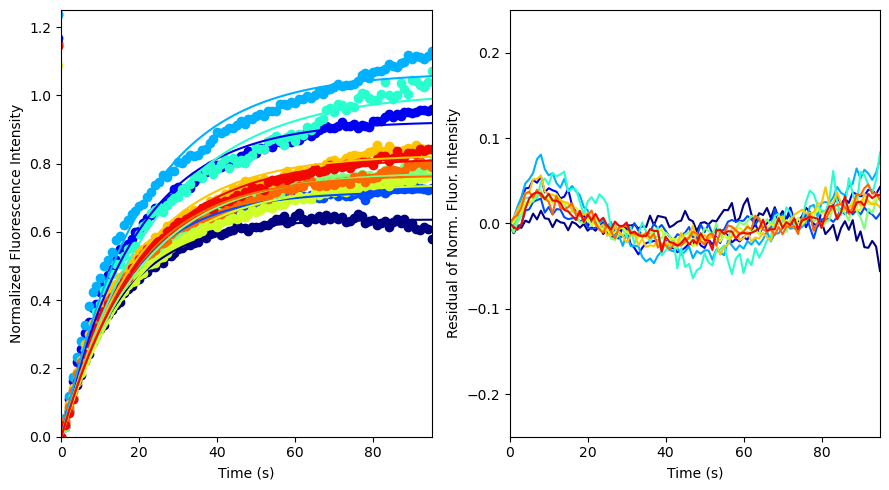

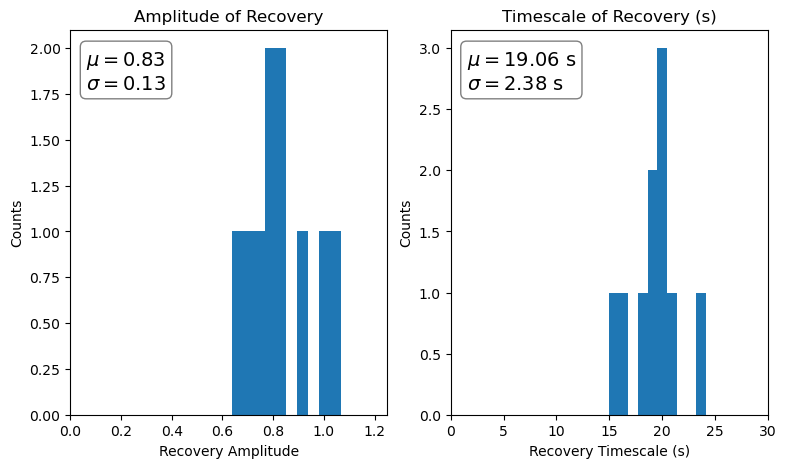

In [4]:
#Now we want to fit the curves and extract fit parameters
#This will just be to a simple exponential fit for now
#In future - will update with a library of different models and wrap 
#single exponential fit inside.

colors = pl.cm.jet(np.linspace(0,1,11))
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharex=True,
                                figsize=(9, 5))
params = np.zeros((10,2))

#We will fit each curve independently to an exponential of the form a*(1-exp(b*t)).
#The recovery timescale is then -1/b, recovery amplitude is a
for i in range(0,10):
    ax0.scatter(time_array,norm_intensities[i], color=colors[i])
    popt, pcov = curve_fit(lambda t, a, b: a *(1 - (np.exp(b*t))), 
                               time_array[4:], norm_intensities[i][4:],  
                               bounds=([0, -5], [2., -0.001]))
    # Extract the optimised parameters
    a = popt[0]
    b = popt[1]
    y_fit = a *(1- np.exp(b*time_array))
    ax0.plot(time_array, y_fit, color=colors[i])
    ax1.plot(time_array, norm_intensities[i]-y_fit, color=colors[i])
    params[i] = [a,b]
    
ax0.set_ylim([0, 1.25])
ax0.set_xlim([0,95])   
ax0.set_xlabel('Time (s)')
ax0.set_ylabel('Normalized Fluorescence Intensity')
ax1.set_ylim([-0.25,0.25])
ax1.set_xlim([0,95])   
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Residual of Norm. Fluor. Intensity')
plt.tight_layout()

#now we want to plot the fitting parameters and calculate the averages
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharex=False,
                                figsize=(9, 5))
#histogram of recovery amplitude
ax0.hist(params[:,0])
ax0.set_xlim([0, 1.25])
ax0.set_title('Amplitude of Recovery')
ax0.set_ylabel('Counts')
ax0.set_xlabel('Recovery Amplitude')
textstr = r'$\mu=$' + f'{np.mean(params[:,0]):.2f}' + '\n' + r'$\sigma=$'+ f'{np.std(params[:,0]):.2f}'
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
# place a text box in upper left in axes coords
ax0.text(0.05, 0.95, textstr, transform=ax0.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

#histogram of recovery timescale
ax1.hist(-1/params[:,1])
ax1.set_xlim([0, 30])
ax1.set_title('Timescale of Recovery (s)')
ax1.set_xlabel('Recovery Timescale (s)')
ax1.set_ylabel('Counts')
mean_tau = -1/np.mean(params[:,1])
std_tau = np.abs(np.std(params[:,1])/np.mean(params[:,1]))*(mean_tau)
textstr = r'$\mu=$' + f'{mean_tau:.2f}' +' s'+ '\n' + r'$\sigma=$'+ f'{std_tau:.2f}' +' s'
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
# place a text box in upper left in axes coords
ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


#Clearly, there is still some structure to the residuals.
#We can likely do better by incorporating more sophisticated diffusion models
#To be continued...